In [1]:
import os
import re

import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scanpy as sc
import anndata
import pandas as pd
import numpy as np

In [5]:
adata = sc.read_h5ad('../backups/final_adata.h5ad')
adata

AnnData object with n_obs × n_vars = 140612 × 30840
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'CELL', 'CONDITION', 'Patient', 'Type', 'Cell_type', 'integrated_snn_res.1.25', 'seurat_clusters', 'integrated_snn_res.2', 'integrated_snn_res.3', 'integrated_snn_res.1', 'integrated_snn_res.0.5', 'active.ident', 'cell_type', 'dataset', 'sample_id', 'cell_type_level_2', 'cell_type_level_3', 'tumor_original_seurat', 'malignant_exclude', 'final_cell_types'
    var: 'is_highly_variable'
    uns: 'cell_type_colors', 'cell_type_level_2_colors', 'cell_type_level_3_colors', 'dataset_colors', 'final_cell_types_colors', 'rank_genes_groups'
    obsm: 'X_umap'
    layers: 'counts'

In [6]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,CELL,CONDITION,Patient,Type,Cell_type,...,integrated_snn_res.0.5,active.ident,cell_type,dataset,sample_id,cell_type_level_2,cell_type_level_3,tumor_original_seurat,malignant_exclude,final_cell_types
wu01_AAACCTGCACATAACC-1,wu01,11822.0,3295,3377.0,1314,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,14,Monocyte,Monocyte,In-house: EUS-FNB,wu01,Monocyte,Monocyte,Monocyte,False,Monocyte
wu01_AAACCTGCACCACGTG-1,wu01,469.0,293,2235.0,450,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,14,Monocyte,Monocyte,In-house: EUS-FNB,wu01,Monocyte,Monocyte,Monocyte,False,Monocyte
wu01_AAACCTGTCTAACTTC-1,wu01,482.0,243,2436.0,400,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,0,Malignant,Malignant,In-house: EUS-FNB,wu01,Malignant_0,Malignant_0,Malignant_0,False,Malignant - Classical Low
wu01_AAACGGGCAAGGCTCC-1,wu01,1516.0,717,2944.0,717,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,2,Monocyte,Monocyte,In-house: EUS-FNB,wu01,Monocyte,Monocyte,Monocyte,False,Monocyte
wu01_AAACGGGTCATTCACT-1,wu01,876.0,453,2491.0,524,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,14,Monocyte,Monocyte,In-house: EUS-FNB,wu01,Monocyte,Monocyte,Monocyte,False,Monocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G9903_filtered_gene_bc_matrices_h5.h5_TTTGGTTTCTACCAGA-1,G9903,8237.0,2326,9379.0,2326,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,1,CAF,CAF,Chan-Seng-Yue,G9903,CAF,CAF,CAF,False,CAF
G9903_filtered_gene_bc_matrices_h5.h5_TTTGTCAAGTTGTCGT-1,G9903,6484.0,1875,9150.0,1886,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,1,CAF,CAF,Chan-Seng-Yue,G9903,CAF,CAF,CAF,False,CAF
G9903_filtered_gene_bc_matrices_h5.h5_TTTGTCACAACTTGAC-1,G9903,8367.0,2286,9400.0,2286,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,1,CAF,CAF,Chan-Seng-Yue,G9903,CAF,CAF,CAF,False,CAF
G9903_filtered_gene_bc_matrices_h5.h5_TTTGTCATCCGAACGC-1,G9903,20314.0,3975,10684.0,3464,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,0,Malignant,Malignant,Chan-Seng-Yue,G9903,Malignant_0,Malignant_0,Malignant_0,False,Malignant - Classical Low


In [7]:
eus = adata[adata.obs['dataset']=='In-house: EUS-FNB']
eus

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


View of AnnData object with n_obs × n_vars = 28313 × 30840
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'CELL', 'CONDITION', 'Patient', 'Type', 'Cell_type', 'integrated_snn_res.1.25', 'seurat_clusters', 'integrated_snn_res.2', 'integrated_snn_res.3', 'integrated_snn_res.1', 'integrated_snn_res.0.5', 'active.ident', 'cell_type', 'dataset', 'sample_id', 'cell_type_level_2', 'cell_type_level_3', 'tumor_original_seurat', 'malignant_exclude', 'final_cell_types'
    var: 'is_highly_variable'
    uns: 'cell_type_colors', 'cell_type_level_2_colors', 'cell_type_level_3_colors', 'dataset_colors', 'final_cell_types_colors', 'rank_genes_groups'
    obsm: 'X_umap'
    layers: 'counts'

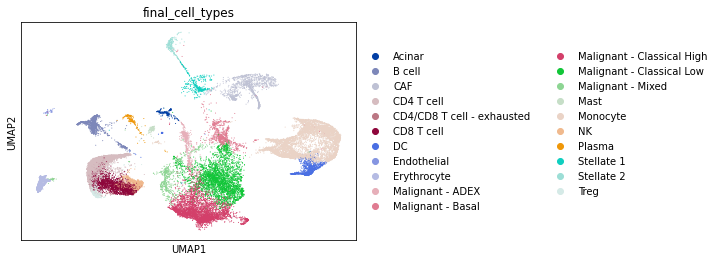

In [8]:
sc.pl.umap(eus, color=['final_cell_types'])

In [10]:
# count malignant cells
malignant = eus[[True if 'Malignant' in c else False
                for c in eus.obs['final_cell_types']]]
malignant

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


View of AnnData object with n_obs × n_vars = 8723 × 30840
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'CELL', 'CONDITION', 'Patient', 'Type', 'Cell_type', 'integrated_snn_res.1.25', 'seurat_clusters', 'integrated_snn_res.2', 'integrated_snn_res.3', 'integrated_snn_res.1', 'integrated_snn_res.0.5', 'active.ident', 'cell_type', 'dataset', 'sample_id', 'cell_type_level_2', 'cell_type_level_3', 'tumor_original_seurat', 'malignant_exclude', 'final_cell_types'
    var: 'is_highly_variable'
    uns: 'cell_type_colors', 'cell_type_level_2_colors', 'cell_type_level_3_colors', 'dataset_colors', 'final_cell_types_colors', 'rank_genes_groups'
    obsm: 'X_umap'
    layers: 'counts'

In [11]:
from collections import Counter

In [12]:
Counter(malignant.obs['final_cell_types']).most_common()

[('Malignant - Classical High', 3612),
 ('Malignant - Classical Low', 3166),
 ('Malignant - Basal', 781),
 ('Malignant - Mixed', 639),
 ('Malignant - ADEX', 525)]

In [13]:
Counter(malignant.obs['sample_id']).most_common()

[('wu28', 1550),
 ('wu07', 1022),
 ('wu03', 861),
 ('wu32', 693),
 ('wu05', 647),
 ('wu26', 581),
 ('wu30', 493),
 ('wu02', 476),
 ('wu24', 354),
 ('wu27', 348),
 ('wu22', 347),
 ('wu14', 319),
 ('wu23', 233),
 ('wu18', 172),
 ('wu16', 149),
 ('wu09', 112),
 ('wu04', 106),
 ('wu15', 79),
 ('wu29', 71),
 ('wu01', 70),
 ('wu25', 34),
 ('wu31', 6)]

In [18]:
pd.crosstab(malignant.obs['sample_id'], malignant.obs['final_cell_types'])

final_cell_types,Malignant - ADEX,Malignant - Basal,Malignant - Classical High,Malignant - Classical Low,Malignant - Mixed
sample_id,,,,,
wu01,3,13,7,40,7
wu02,1,188,69,182,36
wu03,20,7,316,502,16
wu04,1,2,19,82,2
wu05,0,13,204,421,9
wu07,22,490,61,246,203
wu09,2,0,32,76,2
wu14,0,0,193,121,5
wu15,30,1,7,39,2


In [20]:
clinical = pd.read_csv('../data/pdac/eus_clinical.txt', sep='\t')
clinical.index = [x.lower().replace('wu0', 'wu') for x in clinical['Patient/Sample ID']]
clinical

,Patient/Sample ID,1-liner,Sample/Biopsy Date,Gender,Age,Ethnicity,Patient being followed at Wash U?,Stage (AJCC 8),T,N,...,Alcohol use,Body Mass Index,Dz Progression?,Prog date or last imaging f/u,PFS time (mo),Died?,Death date or last clinical f/u,OS time (mo),Notes,Unnamed: 42
wu01,WU001,NaN,2/4/19,Female,61.0,White,No,NaN,3.0,0,...,No,24.90,peritoneal metastasis,2/5/19,NaN,Yes,4/9/19,NaN,No clinical follow up at WashU,NaN
wu02,WU002,NaN,2/4/19,Female,90.0,White,No,NaN,3.0,1,...,No,25.21,mass tethers the small bowel,2/21/19,NaN,Yes,4/3/19,NaN,Final note in pt's chart states to cancel all ...,NaN
wu03,WU003,NaN,3/5/19,Female,71.0,White,No,NaN,2.0,1,...,No,24.96,enlarged nodes suspicious for mets,3/11/19,NaN,Yes,4/3/19,NaN,Last note in pt's chart states pt had stroke a...,NaN
wu04,WU004,NaN,3/22/19,Male,72.0,White,Yes,NaN,2.0,1,...,Yes: Rare,29.26,NaN,10/16/19,NaN,Yes,12/9/20,NaN,Final note says patient passed away in his hom...,NaN
wu05,WU005,NaN,3/27/19,Female,74.0,White,Yes,NaN,3.0,0,...,No,17.92,no evidence of residual mets,10/14/19,NaN,NaN,NaN,NaN,Still alive as of 3/4/22,NaN
wu06,WU006,NaN,3/29/19,Female,60.0,White,Yes,NaN,2.0,1,...,No,26.16,"no, stable",10/22/19,NaN,Yes,3/18/20,NaN,Encounter in chart shows that patient passed a...,NaN
wu07,WU007,NaN,5/3/19,Male,80.0,White,No,NaN,3.0,0,...,Occasional,15.78,terminal,10/1/19,NaN,Yes,10/1/19,NaN,Pt died at home on hospice,NaN
wu08,WU008,NaN,5/14/19,Female,71.0,White,No,NaN,1.0,0,...,No,21.01,NaN,6/13/19,NaN,Yes,8/10/19,NaN,No follow up at WashU,NaN
wu09,WU009,NaN,5/17/19,Female,80.0,White,Yes,NaN,2.0,1,...,Yes: Monthly,22.88,No mets,7/29/19,NaN,Yes,1/14/20,NaN,NaN,NaN
wu10,WU010,NaN,8/1/19,Male,66.0,White,Yes,NaN,2.0,x,...,No,30.08,Stable,8/23/19,NaN,NaN,NaN,NaN,Still alive as of 3/4/22,NaN


In [34]:
clinical.loc['wu05', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu10', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu13', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu14', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu15', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu19', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu21', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu24', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu26', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu31', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu32', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu33', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu34', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu35', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu36', 'Death date or last clinical f/u'] = '3/4/22'
clinical.loc['wu37', 'Death date or last clinical f/u'] = '3/4/22'

clinical['status'] = ['Alive' if pd.isnull(x) else 'Dead'
                     for x in clinical['Died?']]
clinical

,Patient/Sample ID,1-liner,Sample/Biopsy Date,Gender,Age,Ethnicity,Patient being followed at Wash U?,Stage (AJCC 8),T,N,...,Dz Progression?,Prog date or last imaging f/u,PFS time (mo),Died?,Death date or last clinical f/u,OS time (mo),Notes,Unnamed: 42,overall_survival,status
wu01,WU001,NaN,2/4/19,Female,61.0,White,No,NaN,3.0,0,...,peritoneal metastasis,2/5/19,NaN,Yes,4/9/19,NaN,No clinical follow up at WashU,NaN,64.0,Dead
wu02,WU002,NaN,2/4/19,Female,90.0,White,No,NaN,3.0,1,...,mass tethers the small bowel,2/21/19,NaN,Yes,4/3/19,NaN,Final note in pt's chart states to cancel all ...,NaN,58.0,Dead
wu03,WU003,NaN,3/5/19,Female,71.0,White,No,NaN,2.0,1,...,enlarged nodes suspicious for mets,3/11/19,NaN,Yes,4/3/19,NaN,Last note in pt's chart states pt had stroke a...,NaN,29.0,Dead
wu04,WU004,NaN,3/22/19,Male,72.0,White,Yes,NaN,2.0,1,...,NaN,10/16/19,NaN,Yes,12/9/20,NaN,Final note says patient passed away in his hom...,NaN,628.0,Dead
wu05,WU005,NaN,3/27/19,Female,74.0,White,Yes,NaN,3.0,0,...,no evidence of residual mets,10/14/19,NaN,NaN,3/4/22,NaN,Still alive as of 3/4/22,NaN,NaN,Alive
wu06,WU006,NaN,3/29/19,Female,60.0,White,Yes,NaN,2.0,1,...,"no, stable",10/22/19,NaN,Yes,3/18/20,NaN,Encounter in chart shows that patient passed a...,NaN,355.0,Dead
wu07,WU007,NaN,5/3/19,Male,80.0,White,No,NaN,3.0,0,...,terminal,10/1/19,NaN,Yes,10/1/19,NaN,Pt died at home on hospice,NaN,151.0,Dead
wu08,WU008,NaN,5/14/19,Female,71.0,White,No,NaN,1.0,0,...,NaN,6/13/19,NaN,Yes,8/10/19,NaN,No follow up at WashU,NaN,88.0,Dead
wu09,WU009,NaN,5/17/19,Female,80.0,White,Yes,NaN,2.0,1,...,No mets,7/29/19,NaN,Yes,1/14/20,NaN,NaN,NaN,242.0,Dead
wu10,WU010,NaN,8/1/19,Male,66.0,White,Yes,NaN,2.0,x,...,Stable,8/23/19,NaN,NaN,3/4/22,NaN,Still alive as of 3/4/22,NaN,NaN,Alive


In [40]:
import datetime
def get_overall_survival(d1, d2):
    m, d, y = d1.split('/')
    y = '20' + y
    start = datetime.datetime(int(y), int(m), int(d))
    
    m, d, y = d2.split('/')
    y = '20' + y
    end = datetime.datetime(int(y), int(m), int(d))
    
    delta = end - start
    
    return delta.days

In [42]:
clinical['overall_survival'] = [int(get_overall_survival(d1, d2) / 30) if not pd.isnull(d1) and not pd.isnull(d2) else np.nan
                                for d1, d2 in zip(clinical['Sample/Biopsy Date'],
                                                  clinical['Death date or last clinical f/u'])]

In [43]:
clinical

,Patient/Sample ID,1-liner,Sample/Biopsy Date,Gender,Age,Ethnicity,Patient being followed at Wash U?,Stage (AJCC 8),T,N,...,Dz Progression?,Prog date or last imaging f/u,PFS time (mo),Died?,Death date or last clinical f/u,OS time (mo),Notes,Unnamed: 42,overall_survival,status
wu01,WU001,NaN,2/4/19,Female,61.0,White,No,NaN,3.0,0,...,peritoneal metastasis,2/5/19,NaN,Yes,4/9/19,NaN,No clinical follow up at WashU,NaN,2.0,Dead
wu02,WU002,NaN,2/4/19,Female,90.0,White,No,NaN,3.0,1,...,mass tethers the small bowel,2/21/19,NaN,Yes,4/3/19,NaN,Final note in pt's chart states to cancel all ...,NaN,1.0,Dead
wu03,WU003,NaN,3/5/19,Female,71.0,White,No,NaN,2.0,1,...,enlarged nodes suspicious for mets,3/11/19,NaN,Yes,4/3/19,NaN,Last note in pt's chart states pt had stroke a...,NaN,0.0,Dead
wu04,WU004,NaN,3/22/19,Male,72.0,White,Yes,NaN,2.0,1,...,NaN,10/16/19,NaN,Yes,12/9/20,NaN,Final note says patient passed away in his hom...,NaN,20.0,Dead
wu05,WU005,NaN,3/27/19,Female,74.0,White,Yes,NaN,3.0,0,...,no evidence of residual mets,10/14/19,NaN,NaN,3/4/22,NaN,Still alive as of 3/4/22,NaN,35.0,Alive
wu06,WU006,NaN,3/29/19,Female,60.0,White,Yes,NaN,2.0,1,...,"no, stable",10/22/19,NaN,Yes,3/18/20,NaN,Encounter in chart shows that patient passed a...,NaN,11.0,Dead
wu07,WU007,NaN,5/3/19,Male,80.0,White,No,NaN,3.0,0,...,terminal,10/1/19,NaN,Yes,10/1/19,NaN,Pt died at home on hospice,NaN,5.0,Dead
wu08,WU008,NaN,5/14/19,Female,71.0,White,No,NaN,1.0,0,...,NaN,6/13/19,NaN,Yes,8/10/19,NaN,No follow up at WashU,NaN,2.0,Dead
wu09,WU009,NaN,5/17/19,Female,80.0,White,Yes,NaN,2.0,1,...,No mets,7/29/19,NaN,Yes,1/14/20,NaN,NaN,NaN,8.0,Dead
wu10,WU010,NaN,8/1/19,Male,66.0,White,Yes,NaN,2.0,x,...,Stable,8/23/19,NaN,NaN,3/4/22,NaN,Still alive as of 3/4/22,NaN,31.0,Alive


In [338]:
clinical.to_csv('../data/pdac/eus_clinical_formatted.txt', sep='\t')

#### pseudo bulk creation

In [149]:
eus

View of AnnData object with n_obs × n_vars = 28313 × 30840
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'CELL', 'CONDITION', 'Patient', 'Type', 'Cell_type', 'integrated_snn_res.1.25', 'seurat_clusters', 'integrated_snn_res.2', 'integrated_snn_res.3', 'integrated_snn_res.1', 'integrated_snn_res.0.5', 'active.ident', 'cell_type', 'dataset', 'sample_id', 'cell_type_level_2', 'cell_type_level_3', 'tumor_original_seurat', 'malignant_exclude', 'final_cell_types'
    var: 'is_highly_variable'
    uns: 'cell_type_colors', 'cell_type_level_2_colors', 'cell_type_level_3_colors', 'dataset_colors', 'final_cell_types_colors', 'rank_genes_groups'
    obsm: 'X_umap'
    layers: 'counts'

In [150]:
# merge on sample
df = pd.DataFrame(data=eus.layers['counts'].toarray(), columns=eus.var.index.to_list(), index=eus.obs.index.to_list())
df

,AL669831.5,FAM87B,LINC00115,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,...,RP11-766N7.3,RP11-956E11.1,RP11-12K6.2,WASF3-AS1,RP11-7F17.3,RP11-108P20.4,GS1-122H1.2,SLC26A4-AS1,RP11-403B2.6,AP005530.1
wu01_AAACCTGCACATAACC-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wu01_AAACCTGCACCACGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wu01_AAACCTGTCTAACTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wu01_AAACGGGCAAGGCTCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wu01_AAACGGGTCATTCACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wu32_TTTGGTTCATCACGAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wu32_TTTGGTTTCTCGCATC-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wu32_TTTGTCACACGGTGTC-1,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wu32_TTTGTCACAGATGGGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
df['sample_id'] = eus.obs['sample_id'].to_list()
df

,AL669831.5,FAM87B,LINC00115,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,...,RP11-956E11.1,RP11-12K6.2,WASF3-AS1,RP11-7F17.3,RP11-108P20.4,GS1-122H1.2,SLC26A4-AS1,RP11-403B2.6,AP005530.1,sample_id
wu01_AAACCTGCACATAACC-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wu01
wu01_AAACCTGCACCACGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wu01
wu01_AAACCTGTCTAACTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wu01
wu01_AAACGGGCAAGGCTCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wu01
wu01_AAACGGGTCATTCACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wu01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wu32_TTTGGTTCATCACGAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wu32
wu32_TTTGGTTTCTCGCATC-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wu32
wu32_TTTGTCACACGGTGTC-1,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wu32
wu32_TTTGTCACAGATGGGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wu32


In [152]:
df = df.groupby('sample_id').sum()
df = df.transpose()
df

sample_id,wu01,wu02,wu03,wu04,wu05,wu07,wu09,wu14,wu15,wu16,...,wu23,wu24,wu25,wu26,wu27,wu28,wu29,wu30,wu31,wu32
AL669831.5,6.0,5.0,23.0,0.0,16.0,21.0,0.0,9.0,31.0,13.0,...,10.0,28.0,3.0,21.0,12.0,38.0,19.0,15.0,10.0,37.0
FAM87B,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0
LINC00115,35.0,15.0,90.0,0.0,42.0,54.0,0.0,12.0,40.0,17.0,...,5.0,27.0,15.0,44.0,38.0,78.0,23.0,44.0,28.0,48.0
SAMD11,57.0,0.0,0.0,3.0,0.0,12.0,0.0,3.0,0.0,17.0,...,0.0,0.0,0.0,5.0,46.0,0.0,0.0,5.0,0.0,0.0
NOC2L,232.0,92.0,638.0,23.0,79.0,611.0,41.0,207.0,279.0,254.0,...,69.0,275.0,111.0,322.0,356.0,760.0,205.0,410.0,211.0,295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP11-108P20.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GS1-122H1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SLC26A4-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-403B2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
(df / df.sum(axis=0)) * 1000000

sample_id,wu01,wu02,wu03,wu04,wu05,wu07,wu09,wu14,wu15,wu16,...,wu23,wu24,wu25,wu26,wu27,wu28,wu29,wu30,wu31,wu32
AL669831.5,0.900184,1.470154,1.150508,0.000000,3.670384,1.216319,0.000000,2.380200,4.603506,0.868945,...,7.054201,6.359231,1.116786,2.477927,1.372669,1.927790,3.010375,1.069620,1.937281,2.863485
FAM87B,0.450092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.774913,0.232174
LINC00115,5.251074,4.410462,4.501987,0.000000,9.634758,3.127678,0.000000,3.173600,5.940008,1.136312,...,3.527101,6.132116,5.583928,5.191848,4.346786,3.957043,3.644139,3.137553,5.424388,3.714791
SAMD11,8.551749,0.000000,0.000000,2.194213,0.000000,0.695040,0.000000,0.793400,0.000000,1.136312,...,0.000000,0.000000,0.000000,0.589983,5.261899,0.000000,0.000000,0.356540,0.000000,0.000000
NOC2L,34.807117,27.050835,31.914085,16.822298,18.122520,35.389099,33.012257,54.744595,41.431553,16.977844,...,48.673988,62.456734,41.321068,37.994884,40.722519,38.555805,32.480366,29.236288,40.876637,22.830488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP11-108P20.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GS1-122H1.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SLC26A4-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RP11-403B2.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [154]:
df.index.name = 'Gene'

In [155]:
df.to_csv('../data/pdac/pseudo_bulk_cpm.txt', sep='\t')

#### cibersortx deconvolution results

In [171]:
deconv = pd.read_csv('../data/pdac/cibersortx_eus_pseudo_bulk_outs.txt', sep='\t', index_col='Mixture')
deconv = deconv[[c for c in deconv.columns if c!='Other']]
deconv = deconv.iloc[:, :-3]
deconv = deconv.sort_index()
deconv

,Acinar,B cell,CAF,CD4 T cell,CD8 T cell,CD8 T cell - exausted,DC,Endothelial,Erythrocyte,Malignant_0,Malignant_1,Malignant_2,Malignant_3,Malignant_4,Mast,Monocyte,NK,Plasma,Stellate,Treg
Mixture,,,,,,,,,,,,,,,,,,,,
wu01,0.000067,0.049889,0.148100,0.098574,0.000000,0.026366,0.082429,0.000045,0.043452,0.000265,0.000000,0.009412,0.010570,0.013547,0.132944,0.264703,0.091824,0.009195,0.007145,0.000000
wu02,0.000004,0.077198,0.004083,0.077402,0.044808,0.035114,0.249363,0.005196,0.027542,0.044176,0.005867,0.036678,0.019382,0.016462,0.096006,0.173096,0.068045,0.005937,0.013414,0.000000
wu03,0.001629,0.000000,0.000000,0.021852,0.080348,0.051836,0.048720,0.000357,0.085153,0.240589,0.089277,0.043232,0.000000,0.018073,0.116379,0.136612,0.065944,0.000000,0.000000,0.000000
wu04,0.000179,0.012850,0.000006,0.064243,0.000000,0.061144,0.028692,0.000144,0.026369,0.396892,0.078613,0.086102,0.014312,0.025741,0.155164,0.000000,0.047345,0.000000,0.000000,0.000000
wu05,0.000308,0.000000,0.000000,0.033000,0.000000,0.039659,0.081814,0.000090,0.038782,0.304592,0.235928,0.038195,0.000000,0.000000,0.124495,0.042597,0.029725,0.000000,0.000000,0.027636
wu07,0.000585,0.118269,0.015033,0.174981,0.035516,0.025192,0.082507,0.000167,0.041239,0.003575,0.000000,0.090906,0.019562,0.012611,0.060304,0.237366,0.074038,0.008147,0.000000,0.000000
wu09,0.001436,0.007692,0.000000,0.000107,0.000000,0.051568,0.018408,0.000449,0.005197,0.341057,0.232545,0.066440,0.000000,0.021777,0.110109,0.000000,0.045246,0.000000,0.000000,0.097969
wu14,0.000041,0.041424,0.059354,0.120918,0.075470,0.015946,0.068149,0.000013,0.023542,0.048796,0.170466,0.033170,0.041673,0.015176,0.061344,0.103104,0.044053,0.001011,0.070129,0.000000
wu15,0.000095,0.093825,0.001656,0.454125,0.057154,0.000000,0.187316,0.000021,0.009178,0.016373,0.015054,0.014617,0.013732,0.027301,0.004317,0.020724,0.069362,0.005112,0.000000,0.010037


In [172]:
m = {
    'CD8 T cell - exausted': 'CD4/CD8 T cell - exhausted',
    'Malignant_0': 'Malignant - Classical Low',
    'Malignant_1': 'Malignant - Classical High',
    'Malignant_2': 'Malignant - Basal',
    'Malignant_3': 'Malignant - Mixed',
    'Malignant_4': 'Malignant - ADEX',
}
deconv.columns = [m.get(c, c) for c in deconv.columns]
deconv

,Acinar,B cell,CAF,CD4 T cell,CD8 T cell,CD4/CD8 T cell - exhausted,DC,Endothelial,Erythrocyte,Malignant - Classical Low,Malignant - Classical High,Malignant - Basal,Malignant - Mixed,Malignant - ADEX,Mast,Monocyte,NK,Plasma,Stellate,Treg
Mixture,,,,,,,,,,,,,,,,,,,,
wu01,0.000067,0.049889,0.148100,0.098574,0.000000,0.026366,0.082429,0.000045,0.043452,0.000265,0.000000,0.009412,0.010570,0.013547,0.132944,0.264703,0.091824,0.009195,0.007145,0.000000
wu02,0.000004,0.077198,0.004083,0.077402,0.044808,0.035114,0.249363,0.005196,0.027542,0.044176,0.005867,0.036678,0.019382,0.016462,0.096006,0.173096,0.068045,0.005937,0.013414,0.000000
wu03,0.001629,0.000000,0.000000,0.021852,0.080348,0.051836,0.048720,0.000357,0.085153,0.240589,0.089277,0.043232,0.000000,0.018073,0.116379,0.136612,0.065944,0.000000,0.000000,0.000000
wu04,0.000179,0.012850,0.000006,0.064243,0.000000,0.061144,0.028692,0.000144,0.026369,0.396892,0.078613,0.086102,0.014312,0.025741,0.155164,0.000000,0.047345,0.000000,0.000000,0.000000
wu05,0.000308,0.000000,0.000000,0.033000,0.000000,0.039659,0.081814,0.000090,0.038782,0.304592,0.235928,0.038195,0.000000,0.000000,0.124495,0.042597,0.029725,0.000000,0.000000,0.027636
wu07,0.000585,0.118269,0.015033,0.174981,0.035516,0.025192,0.082507,0.000167,0.041239,0.003575,0.000000,0.090906,0.019562,0.012611,0.060304,0.237366,0.074038,0.008147,0.000000,0.000000
wu09,0.001436,0.007692,0.000000,0.000107,0.000000,0.051568,0.018408,0.000449,0.005197,0.341057,0.232545,0.066440,0.000000,0.021777,0.110109,0.000000,0.045246,0.000000,0.000000,0.097969
wu14,0.000041,0.041424,0.059354,0.120918,0.075470,0.015946,0.068149,0.000013,0.023542,0.048796,0.170466,0.033170,0.041673,0.015176,0.061344,0.103104,0.044053,0.001011,0.070129,0.000000
wu15,0.000095,0.093825,0.001656,0.454125,0.057154,0.000000,0.187316,0.000021,0.009178,0.016373,0.015054,0.014617,0.013732,0.027301,0.004317,0.020724,0.069362,0.005112,0.000000,0.010037


In [173]:
deconv.to_csv('../data/pdac/cibersortx_eus_pseudo_bulk_fractions.txt', sep='\t')

#### single cell eus fractions to community

In [174]:
freq = pd.crosstab(eus.obs['sample_id'], eus.obs['final_cell_types'])
freq = freq.sort_values(['Malignant - Basal'], ascending=False)
fractions = pd.DataFrame(data=freq.values / freq.values.sum(axis=1).reshape((-1, 1)),
                         columns=list(freq.columns), index=freq.index.to_list())
fractions['Stellate'] = fractions[['Stellate 1', 'Stellate 2']].values.sum(axis=1).flatten()
fractions = fractions[[c for c in fractions.columns if 'Stellate 1'!=c and 'Stellate 2'!=c]]
fractions = fractions.loc[deconv.index.to_list(), deconv.columns]
fractions

,Acinar,B cell,CAF,CD4 T cell,CD8 T cell,CD4/CD8 T cell - exhausted,DC,Endothelial,Erythrocyte,Malignant - Classical Low,Malignant - Classical High,Malignant - Basal,Malignant - Mixed,Malignant - ADEX,Mast,Monocyte,NK,Plasma,Stellate,Treg
wu01,0.000000,0.035883,0.208687,0.005666,0.015109,0.000000,0.050992,0.000944,0.000944,0.037771,0.006610,0.012276,0.006610,0.002833,0.025496,0.501416,0.032106,0.026440,0.025496,0.004721
wu02,0.000000,0.062751,0.071787,0.007530,0.013554,0.000502,0.126506,0.006024,0.000000,0.091365,0.034639,0.094378,0.018072,0.000502,0.006526,0.396084,0.008032,0.013554,0.045683,0.002510
wu03,0.000000,0.002324,0.000581,0.024985,0.066241,0.012783,0.001743,0.002905,0.017432,0.291691,0.183614,0.004067,0.009297,0.011621,0.006973,0.314933,0.042417,0.003486,0.000581,0.002324
wu04,0.000000,0.000000,0.026549,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.725664,0.168142,0.017699,0.017699,0.008850,0.000000,0.008850,0.026549,0.000000,0.000000,0.000000
wu05,0.000000,0.000000,0.001451,0.010160,0.002903,0.000000,0.000000,0.000000,0.000000,0.611030,0.296081,0.018868,0.013062,0.000000,0.001451,0.036284,0.001451,0.001451,0.002903,0.002903
wu07,0.000501,0.089384,0.030796,0.105158,0.030045,0.004757,0.088883,0.000501,0.000000,0.061592,0.015273,0.122684,0.050826,0.005508,0.007011,0.335253,0.022534,0.011267,0.008262,0.009765
wu09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.660870,0.278261,0.000000,0.017391,0.017391,0.000000,0.026087,0.000000,0.000000,0.000000,0.000000
wu14,0.000000,0.017544,0.416876,0.037594,0.061821,0.001671,0.023392,0.000000,0.000000,0.101086,0.161236,0.000000,0.004177,0.000000,0.000000,0.111947,0.013367,0.001671,0.039265,0.008354
wu15,0.001727,0.112263,0.007772,0.468048,0.088946,0.000864,0.042314,0.000864,0.000000,0.033679,0.006045,0.000864,0.001727,0.025907,0.000864,0.163212,0.018135,0.006045,0.006045,0.014680
wu16,0.004882,0.020417,0.004439,0.109188,0.031514,0.000000,0.014203,0.000444,0.552597,0.012428,0.001332,0.001332,0.012428,0.038615,0.000444,0.165557,0.002663,0.000444,0.021749,0.005326


<AxesSubplot:ylabel='Mixture'>

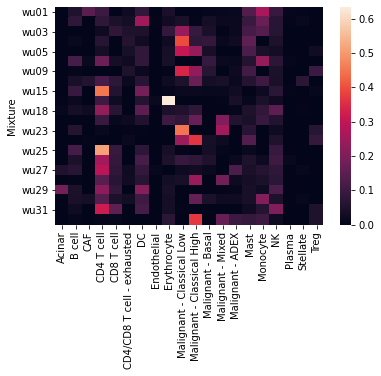

In [175]:
sns.heatmap(deconv)

<AxesSubplot:>

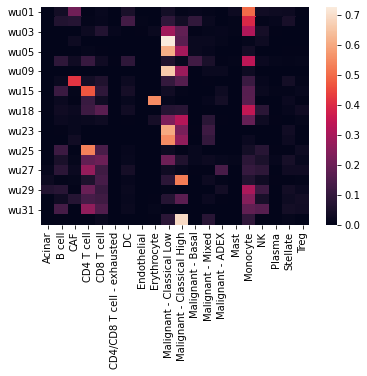

In [176]:
sns.heatmap(fractions)

<AxesSubplot:xlabel='single cell cell type fractions', ylabel='pseudo bulk deconv fractions'>

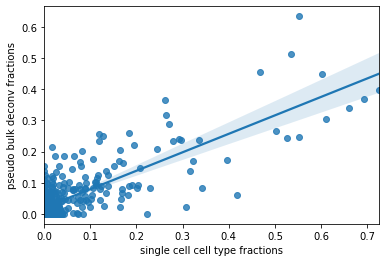

In [180]:
xs, ys = fractions.values.flatten(), deconv.values.flatten()
pdf = pd.DataFrame.from_dict({
    'single cell cell type fractions': xs,
    'pseudo bulk deconv fractions': ys
})
sns.regplot(data=pdf, x='single cell cell type fractions', y='pseudo bulk deconv fractions')

#### pseudo bulk community integration

In [192]:
bulk_deconv = pd.read_csv('../results/survival/05242021/all.tsv', sep='\t', index_col=0)
bulk_deconv

,Acinar,B_cell,CAF,CD4_T_cell,CD8_T_cell,CD8_T_cell_-_exausted,DC,Endothelial,Erythrocyte,Malignant_0,...,Malignant_2_tumor_fraction,Malignant_3_tumor_fraction,Malignant_4_tumor_fraction,age,gender,race,tumor_stage,survival_time,status,dataset
SA518851,0.001829,0.045292,0.184032,0.059004,0.000000,0.029009,0.000000,0.010474,0.002339,0.026129,...,0.770468,0.127692,0.034106,67.0,male,unknown,unknown,5,2,bailey
SA528766,0.012772,0.090721,0.019602,0.000000,0.046757,0.027078,0.000000,0.003788,0.000388,0.269909,...,0.202108,0.000000,0.210455,61.0,female,unknown,unknown,8,2,bailey
SA528763,0.002718,0.042581,0.248410,0.000000,0.076992,0.000000,0.001299,0.054353,0.000000,0.170679,...,0.000000,0.000000,0.061109,52.0,male,unknown,unknown,36,2,bailey
SA518854,0.130321,0.048956,0.145984,0.010060,0.020539,0.014988,0.000000,0.023105,0.000000,0.160575,...,0.204188,0.133946,0.073802,55.0,male,unknown,unknown,5,1,bailey
SA518806,0.002602,0.038245,0.123989,0.000000,0.040949,0.012734,0.000000,0.017046,0.000000,0.253840,...,0.246252,0.034876,0.071858,51.0,female,unknown,unknown,14,2,bailey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_11_02_A148a,0.003152,0.061532,0.064676,0.029957,0.020903,0.030236,0.011758,0.019295,0.018276,0.215197,...,0.067763,0.186472,0.089891,68.0,male,white,unknown,20,2,kirby
T_11_04_A026b,0.000431,0.107861,0.059038,0.000000,0.045938,0.021208,0.034816,0.044107,0.020195,0.118582,...,0.067889,0.080138,0.222934,64.0,female,white,unknown,49,1,kirby
T_11_05_A018b,0.035875,0.040466,0.072274,0.040187,0.000558,0.027236,0.002615,0.017259,0.016496,0.172285,...,0.076582,0.025945,0.159389,76.0,male,white,unknown,36,2,kirby
T_11_06_A011a,0.004866,0.173547,0.061743,0.000000,0.035965,0.002228,0.097064,0.019898,0.016130,0.156820,...,0.165348,0.108672,0.108823,68.0,female,white,unknown,10,2,kirby


In [193]:
m = {
    'B_cell': 'B cell',
    'CD4_T_cell': 'CD4 T cell',
    'CD8_T_cell': 'CD8 T cell',
    'CD8_T_cell_-_exausted': 'CD4/CD8 T cell - exhausted',
    'Malignant_0': 'Malignant - Classical Low',
    'Malignant_1': 'Malignant - Classical High',
    'Malignant_2': 'Malignant - Basal',
    'Malignant_3': 'Malignant - Mixed',
    'Malignant_4': 'Malignant - ADEX',
}
bulk_deconv.columns = [m.get(c, c) for c in bulk_deconv.columns]
bulk_deconv = bulk_deconv[[c for c in bulk_deconv.columns if 'fraction' not in c]]
bulk_deconv

,Acinar,B cell,CAF,CD4 T cell,CD8 T cell,CD4/CD8 T cell - exhausted,DC,Endothelial,Erythrocyte,Malignant - Classical Low,...,Plasma,Stellate,Treg,age,gender,race,tumor_stage,survival_time,status,dataset
SA518851,0.001829,0.045292,0.184032,0.059004,0.000000,0.029009,0.000000,0.010474,0.002339,0.026129,...,0.000121,0.005766,0.105584,67.0,male,unknown,unknown,5,2,bailey
SA528766,0.012772,0.090721,0.019602,0.000000,0.046757,0.027078,0.000000,0.003788,0.000388,0.269909,...,0.000000,0.009528,0.110626,61.0,female,unknown,unknown,8,2,bailey
SA528763,0.002718,0.042581,0.248410,0.000000,0.076992,0.000000,0.001299,0.054353,0.000000,0.170679,...,0.009044,0.006246,0.132687,52.0,male,unknown,unknown,36,2,bailey
SA518854,0.130321,0.048956,0.145984,0.010060,0.020539,0.014988,0.000000,0.023105,0.000000,0.160575,...,0.000000,0.026713,0.104766,55.0,male,unknown,unknown,5,1,bailey
SA518806,0.002602,0.038245,0.123989,0.000000,0.040949,0.012734,0.000000,0.017046,0.000000,0.253840,...,0.002925,0.011739,0.142231,51.0,female,unknown,unknown,14,2,bailey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_11_02_A148a,0.003152,0.061532,0.064676,0.029957,0.020903,0.030236,0.011758,0.019295,0.018276,0.215197,...,0.005231,0.020434,0.018599,68.0,male,white,unknown,20,2,kirby
T_11_04_A026b,0.000431,0.107861,0.059038,0.000000,0.045938,0.021208,0.034816,0.044107,0.020195,0.118582,...,0.060428,0.046672,0.085364,64.0,female,white,unknown,49,1,kirby
T_11_05_A018b,0.035875,0.040466,0.072274,0.040187,0.000558,0.027236,0.002615,0.017259,0.016496,0.172285,...,0.015341,0.016100,0.036964,76.0,male,white,unknown,36,2,kirby
T_11_06_A011a,0.004866,0.173547,0.061743,0.000000,0.035965,0.002228,0.097064,0.019898,0.016130,0.156820,...,0.006883,0.015629,0.101702,68.0,female,white,unknown,10,2,kirby


In [194]:
bulk_clinical = bulk_deconv.iloc[:, -7:]
bulk_deconv = bulk_deconv.iloc[:, :-7]
bulk_deconv = bulk_deconv[deconv.columns]
bulk_deconv

,Acinar,B cell,CAF,CD4 T cell,CD8 T cell,CD4/CD8 T cell - exhausted,DC,Endothelial,Erythrocyte,Malignant - Classical Low,Malignant - Classical High,Malignant - Basal,Malignant - Mixed,Malignant - ADEX,Mast,Monocyte,NK,Plasma,Stellate,Treg
SA518851,0.001829,0.045292,0.184032,0.059004,0.000000,0.029009,0.000000,0.010474,0.002339,0.026129,0.000000,0.297218,0.049259,0.013157,0.012588,0.009185,0.057373,0.000121,0.005766,0.105584
SA528766,0.012772,0.090721,0.019602,0.000000,0.046757,0.027078,0.000000,0.003788,0.000388,0.269909,0.019275,0.099494,0.000000,0.103603,0.000000,0.032293,0.057806,0.000000,0.009528,0.110626
SA528763,0.002718,0.042581,0.248410,0.000000,0.076992,0.000000,0.001299,0.054353,0.000000,0.170679,0.019377,0.000000,0.000000,0.012370,0.000000,0.037447,0.056987,0.009044,0.006246,0.132687
SA518854,0.130321,0.048956,0.145984,0.010060,0.020539,0.014988,0.000000,0.023105,0.000000,0.160575,0.000000,0.055755,0.036575,0.020152,0.000000,0.041855,0.056939,0.000000,0.026713,0.104766
SA518806,0.002602,0.038245,0.123989,0.000000,0.040949,0.012734,0.000000,0.017046,0.000000,0.253840,0.006996,0.099273,0.014060,0.028969,0.000000,0.027625,0.055637,0.002925,0.011739,0.142231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_11_02_A148a,0.003152,0.061532,0.064676,0.029957,0.020903,0.030236,0.011758,0.019295,0.018276,0.215197,0.124997,0.035148,0.096721,0.046625,0.010623,0.025551,0.073956,0.005231,0.020434,0.018599
T_11_04_A026b,0.000431,0.107861,0.059038,0.000000,0.045938,0.021208,0.034816,0.044107,0.020195,0.118582,0.031134,0.016158,0.019073,0.053060,0.000000,0.051150,0.071523,0.060428,0.046672,0.085364
T_11_05_A018b,0.035875,0.040466,0.072274,0.040187,0.000558,0.027236,0.002615,0.017259,0.016496,0.172285,0.182113,0.036772,0.012458,0.076532,0.005498,0.032049,0.091486,0.015341,0.016100,0.036964
T_11_06_A011a,0.004866,0.173547,0.061743,0.000000,0.035965,0.002228,0.097064,0.019898,0.016130,0.156820,0.000000,0.042015,0.027614,0.027652,0.000000,0.028066,0.088266,0.006883,0.015629,0.101702


In [344]:
bulk_deconv

,Acinar,B cell,CAF,CD4 T cell,CD8 T cell,CD4/CD8 T cell - exhausted,DC,Endothelial,Erythrocyte,Malignant - Classical Low,Malignant - Classical High,Malignant - Basal,Malignant - Mixed,Malignant - ADEX,Mast,Monocyte,NK,Plasma,Stellate,Treg
SA518851,0.001829,0.045292,0.184032,0.059004,0.000000,0.029009,0.000000,0.010474,0.002339,0.026129,0.000000,0.297218,0.049259,0.013157,0.012588,0.009185,0.057373,0.000121,0.005766,0.105584
SA528766,0.012772,0.090721,0.019602,0.000000,0.046757,0.027078,0.000000,0.003788,0.000388,0.269909,0.019275,0.099494,0.000000,0.103603,0.000000,0.032293,0.057806,0.000000,0.009528,0.110626
SA528763,0.002718,0.042581,0.248410,0.000000,0.076992,0.000000,0.001299,0.054353,0.000000,0.170679,0.019377,0.000000,0.000000,0.012370,0.000000,0.037447,0.056987,0.009044,0.006246,0.132687
SA518854,0.130321,0.048956,0.145984,0.010060,0.020539,0.014988,0.000000,0.023105,0.000000,0.160575,0.000000,0.055755,0.036575,0.020152,0.000000,0.041855,0.056939,0.000000,0.026713,0.104766
SA518806,0.002602,0.038245,0.123989,0.000000,0.040949,0.012734,0.000000,0.017046,0.000000,0.253840,0.006996,0.099273,0.014060,0.028969,0.000000,0.027625,0.055637,0.002925,0.011739,0.142231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_11_02_A148a,0.003152,0.061532,0.064676,0.029957,0.020903,0.030236,0.011758,0.019295,0.018276,0.215197,0.124997,0.035148,0.096721,0.046625,0.010623,0.025551,0.073956,0.005231,0.020434,0.018599
T_11_04_A026b,0.000431,0.107861,0.059038,0.000000,0.045938,0.021208,0.034816,0.044107,0.020195,0.118582,0.031134,0.016158,0.019073,0.053060,0.000000,0.051150,0.071523,0.060428,0.046672,0.085364
T_11_05_A018b,0.035875,0.040466,0.072274,0.040187,0.000558,0.027236,0.002615,0.017259,0.016496,0.172285,0.182113,0.036772,0.012458,0.076532,0.005498,0.032049,0.091486,0.015341,0.016100,0.036964
T_11_06_A011a,0.004866,0.173547,0.061743,0.000000,0.035965,0.002228,0.097064,0.019898,0.016130,0.156820,0.000000,0.042015,0.027614,0.027652,0.000000,0.028066,0.088266,0.006883,0.015629,0.101702


In [345]:
bulk_deconv.to_csv('../results/survival/05242021/all_slim.tsv', sep='\t')

In [198]:
# combine bulk and pseudo
combined = pd.concat((deconv, bulk_deconv), axis=0)
combined['dataset'] = [bulk_clinical.loc[s, 'dataset'] if s in bulk_clinical.index else 'eus pseudo'
                       for s in combined.index.to_list()]
combined

,Acinar,B cell,CAF,CD4 T cell,CD8 T cell,CD4/CD8 T cell - exhausted,DC,Endothelial,Erythrocyte,Malignant - Classical Low,...,Malignant - Basal,Malignant - Mixed,Malignant - ADEX,Mast,Monocyte,NK,Plasma,Stellate,Treg,dataset
wu01,0.000067,0.049889,0.148100,0.098574,0.000000,0.026366,0.082429,0.000045,0.043452,0.000265,...,0.009412,0.010570,0.013547,0.132944,0.264703,0.091824,0.009195,0.007145,0.000000,eus pseudo
wu02,0.000004,0.077198,0.004083,0.077402,0.044808,0.035114,0.249363,0.005196,0.027542,0.044176,...,0.036678,0.019382,0.016462,0.096006,0.173096,0.068045,0.005937,0.013414,0.000000,eus pseudo
wu03,0.001629,0.000000,0.000000,0.021852,0.080348,0.051836,0.048720,0.000357,0.085153,0.240589,...,0.043232,0.000000,0.018073,0.116379,0.136612,0.065944,0.000000,0.000000,0.000000,eus pseudo
wu04,0.000179,0.012850,0.000006,0.064243,0.000000,0.061144,0.028692,0.000144,0.026369,0.396892,...,0.086102,0.014312,0.025741,0.155164,0.000000,0.047345,0.000000,0.000000,0.000000,eus pseudo
wu05,0.000308,0.000000,0.000000,0.033000,0.000000,0.039659,0.081814,0.000090,0.038782,0.304592,...,0.038195,0.000000,0.000000,0.124495,0.042597,0.029725,0.000000,0.000000,0.027636,eus pseudo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_11_02_A148a,0.003152,0.061532,0.064676,0.029957,0.020903,0.030236,0.011758,0.019295,0.018276,0.215197,...,0.035148,0.096721,0.046625,0.010623,0.025551,0.073956,0.005231,0.020434,0.018599,kirby
T_11_04_A026b,0.000431,0.107861,0.059038,0.000000,0.045938,0.021208,0.034816,0.044107,0.020195,0.118582,...,0.016158,0.019073,0.053060,0.000000,0.051150,0.071523,0.060428,0.046672,0.085364,kirby
T_11_05_A018b,0.035875,0.040466,0.072274,0.040187,0.000558,0.027236,0.002615,0.017259,0.016496,0.172285,...,0.036772,0.012458,0.076532,0.005498,0.032049,0.091486,0.015341,0.016100,0.036964,kirby
T_11_06_A011a,0.004866,0.173547,0.061743,0.000000,0.035965,0.002228,0.097064,0.019898,0.016130,0.156820,...,0.042015,0.027614,0.027652,0.000000,0.028066,0.088266,0.006883,0.015629,0.101702,kirby


In [347]:
combined.to_csv('../results/survival/05242021/all_plus_eus_pseudo.tsv', sep='\t')

In [226]:
# break into dataset specific for normalization and integration
tcga = combined[combined['dataset']=='tcga'][[c for c in combined.columns if c!='dataset']]
bailey = combined[combined['dataset']=='bailey'][[c for c in combined.columns if c!='dataset']]
moffit = combined[combined['dataset']=='moffit'][[c for c in combined.columns if c!='dataset']]
kirby = combined[combined['dataset']=='kirby'][[c for c in combined.columns if c!='dataset']]
pseudo = combined[combined['dataset']=='eus pseudo'][[c for c in combined.columns if c!='dataset']]
tcga.shape, bailey.shape, moffit.shape, kirby.shape, pseudo.shape

((136, 20), (87, 20), (123, 20), (45, 20), (22, 20))

In [227]:
from sklearn.preprocessing import StandardScaler
tcga_adata = anndata.AnnData(X=StandardScaler().fit_transform(tcga.values))
tcga_adata.obs.index, tcga_adata.var.index = tcga.index.to_list(), tcga.columns

bailey_adata = anndata.AnnData(X=StandardScaler().fit_transform(bailey.values))
bailey_adata.obs.index, bailey_adata.var.index = bailey.index.to_list(), bailey.columns

moffit_adata = anndata.AnnData(X=StandardScaler().fit_transform(moffit.values))
moffit_adata.obs.index, moffit_adata.var.index = moffit.index.to_list(), moffit.columns

kirby_adata = anndata.AnnData(X=StandardScaler().fit_transform(kirby.values))
kirby_adata.obs.index, kirby_adata.var.index = kirby.index.to_list(), kirby.columns

pseudo_adata = anndata.AnnData(X=StandardScaler().fit_transform(pseudo.values))
pseudo_adata.obs.index, pseudo_adata.var.index = pseudo.index.to_list(), pseudo.columns

In [228]:
community_adata = sc.read_h5ad('../results/survival/05242021/integrated_v2.h5ad')
community_adata.obs

,age,gender,race,tumor_stage,survival_time,status,dataset,Malignant_0_tumor_fraction,Malignant_1_tumor_fraction,Malignant_2_tumor_fraction,Malignant_3_tumor_fraction,Malignant_4_tumor_fraction,leiden
SA518851,67.0,male,unknown,unknown,5,2,bailey,0.067734,0.000000,0.770468,0.127692,0.034106,4
SA528766,61.0,female,unknown,unknown,8,2,bailey,0.548283,0.039154,0.202108,0.000000,0.210455,0
SA528763,52.0,male,unknown,unknown,36,2,bailey,0.843169,0.095722,0.000000,0.000000,0.061109,2
SA518854,55.0,male,unknown,unknown,5,1,bailey,0.588064,0.000000,0.204188,0.133946,0.073802,2
SA518806,51.0,female,unknown,unknown,14,2,bailey,0.629661,0.017354,0.246252,0.034876,0.071858,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_11_02_A148a,68.0,male,white,unknown,20,2,kirby,0.414887,0.240987,0.067763,0.186472,0.089891,0
T_11_04_A026b,64.0,female,white,unknown,49,1,kirby,0.498230,0.130810,0.067889,0.080138,0.222934,5
T_11_05_A018b,76.0,male,white,unknown,36,2,kirby,0.358808,0.379275,0.076582,0.025945,0.159389,6
T_11_06_A011a,68.0,female,white,unknown,10,2,kirby,0.617157,0.000000,0.165348,0.108672,0.108823,0


In [229]:
# same params as used for previous bulk only analysis
def integrate_adata(ref, adatas):
    sc.pp.neighbors(ref, n_neighbors=10)
    sc.pp.pca(ref)
    sc.tl.umap(ref, spread=5.)
#     sc.tl.leiden(ref, resolution=.8)
    ref.obs['leiden'] = [community_adata.obs.loc[s, 'leiden'] for s in ref.obs.index.to_list()]
    
    final = None
    for adata in adatas:
        sc.tl.ingest(adata, ref, obs=['leiden'])
        if final is None:
            final = anndata.concat((ref, adata))
        else:
            final = anndata.concat((final, adata))
    return final

# integrated = integrate_adata(community_adata.copy(),
#                              [pseudo_adata.copy()])
integrated = integrate_adata(bailey_adata.copy(),
                             [tcga_adata.copy(), moffit_adata.copy(), kirby_adata.copy(), pseudo_adata.copy()])
integrated

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/umap/umap_.py:1158: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


AnnData object with n_obs × n_vars = 413 × 20
    obs: 'leiden'
    obsm: 'X_umap', 'X_pca'

In [235]:
integrated.obs['dataset'] = [combined.loc[s, 'dataset'] for s in integrated.obs.index.to_list()]
names = {
    '0': 'Classical Low',
    '1': 'ADEX',
    '2': 'CAF High',
    '3': 'Basal/Classical',
    '4': 'Basal',
    '5': 'Mixed - Immune High',
    '6': 'Classical High',
}
integrated.obs['community'] = [names[x] for x in integrated.obs['leiden']]

... storing 'dataset' as categorical
... storing 'community' as categorical


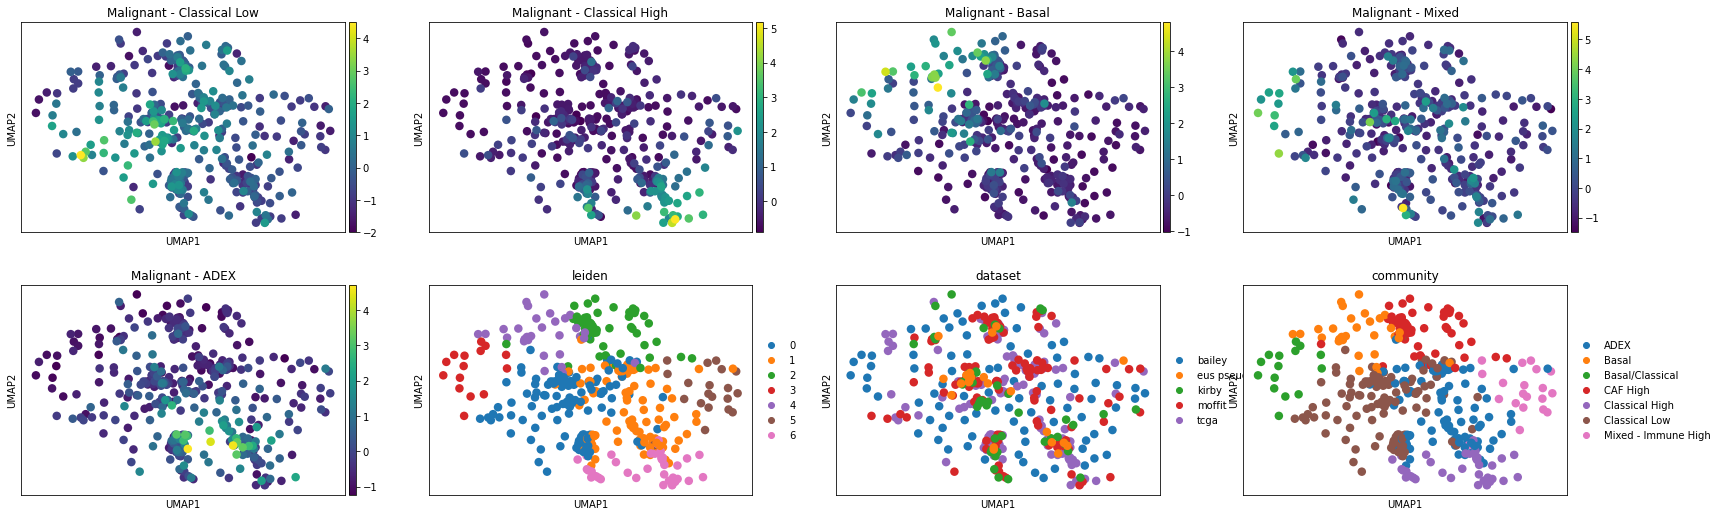

In [236]:
colors = ['Malignant - Classical Low', 'Malignant - Classical High',
          'Malignant - Basal', 'Malignant - Mixed', 'Malignant - ADEX', 'leiden',
         'dataset', 'community']
sc.pl.umap(integrated, color=colors)

In [336]:
integrated.write_h5ad('../results/survival/03102022/integrated_with_eusfnb_pseudo.h5ad')

In [237]:
pseudo_only = integrated[integrated.obs['dataset']=='eus pseudo']
pseudo_only

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


View of AnnData object with n_obs × n_vars = 22 × 20
    obs: 'leiden', 'dataset', 'cluster', 'community'
    uns: 'leiden_colors', 'dataset_colors', 'cluster_colors', 'community_colors'
    obsm: 'X_umap', 'X_pca'

In [285]:
df = clinical[['overall_survival', 'status']]
df['community'] = [pseudo_only.obs.loc[s, 'community'] if s in pseudo_only.obs.index else np.nan
                   for s in df.index.to_list()]
df = df[~pd.isnull(df['community'])]
df

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,overall_survival,status,community
wu01,2.0,Dead,CAF High
wu02,1.0,Dead,Basal
wu03,0.0,Dead,Classical Low
wu04,20.0,Dead,Classical Low
wu05,35.0,Alive,Classical Low
wu07,5.0,Dead,Basal
wu09,8.0,Dead,Classical Low
wu14,29.0,Alive,Mixed - Immune High
wu15,29.0,Alive,Classical Low
wu16,7.0,Dead,Classical Low


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'CAF High'),
  Text(1, 0, 'Basal'),
  Text(2, 0, 'Classical Low'),
  Text(3, 0, 'Mixed - Immune High'),
  Text(4, 0, 'ADEX'),
  Text(5, 0, 'Classical High')])

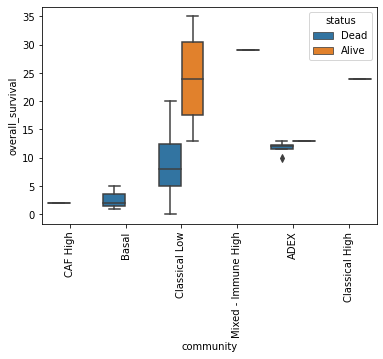

In [286]:
sns.boxplot(data=df, x='community', y='overall_survival', hue='status')
plt.xticks(rotation=90)

In [247]:
Counter(integrated.obs['community']).most_common()

[('Classical Low', 150),
 ('ADEX', 95),
 ('CAF High', 62),
 ('Classical High', 38),
 ('Basal', 33),
 ('Mixed - Immune High', 20),
 ('Basal/Classical', 15)]

In [248]:
df.sort_values('overall_survival')

,overall_survival,status,community
wu03,0.0,Dead,Classical Low
wu02,1.0,Dead,Basal
wu01,2.0,Dead,CAF High
wu30,2.0,Dead,Basal
wu25,3.0,Dead,Classical Low
wu07,5.0,Dead,Basal
wu16,7.0,Dead,Classical Low
wu09,8.0,Dead,Classical Low
wu22,10.0,Dead,ADEX
wu28,12.0,Dead,ADEX


In [249]:
bulk_integrated = integrated[integrated.obs['dataset']!='eus pseudo']
bulk_integrated

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


View of AnnData object with n_obs × n_vars = 391 × 20
    obs: 'leiden', 'dataset', 'cluster', 'community'
    uns: 'leiden_colors', 'dataset_colors', 'cluster_colors', 'community_colors'
    obsm: 'X_umap', 'X_pca'

In [252]:
df = pd.DataFrame(data=bulk_integrated.X.toarray(),
                 columns=bulk_integrated.var.index.to_list(), index=bulk_integrated.obs.index.to_list())
df['community'] = bulk_integrated.obs['community']
centroids = df.groupby('community').mean()
centroids

,Acinar,B cell,CAF,CD4 T cell,CD8 T cell,CD4/CD8 T cell - exhausted,DC,Endothelial,Erythrocyte,Malignant - Classical Low,Malignant - Classical High,Malignant - Basal,Malignant - Mixed,Malignant - ADEX,Mast,Monocyte,NK,Plasma,Stellate,Treg
community,,,,,,,,,,,,,,,,,,,,
ADEX,0.501894,-0.287541,-0.186896,-0.150082,0.412756,-0.277419,-0.020967,0.314641,-0.102439,-0.548569,-0.099643,-0.395271,-0.059989,0.839127,-0.068588,0.372162,-0.755404,-0.132775,-0.008194,0.169557
Basal,-0.303389,0.344839,0.335459,-0.006087,-0.445117,0.873346,-0.399520,-0.437704,-0.160678,-0.574050,-0.586408,1.985358,-0.328986,-0.341679,-0.142072,0.393933,0.024111,0.083843,-0.404092,-0.380521
Basal/Classical,-0.349578,-0.287190,-1.013284,1.427366,-0.835013,1.239818,-0.216104,-0.783561,1.786111,-0.183420,-0.554248,1.000814,2.070556,-0.875073,1.703706,-0.848661,-0.286833,-0.438985,-0.116126,-1.352518
CAF High,-0.226224,-0.163921,1.500803,-0.110500,-0.187748,-0.122809,-0.220108,-0.447178,-0.088948,0.152415,-0.398976,0.119321,-0.108424,-0.625193,-0.154636,-0.060592,0.148087,-0.119687,-0.214731,-0.041346
Classical High,-0.369167,-0.259843,-0.568743,-0.145034,-0.409833,-0.305173,1.013520,-0.139106,0.019355,-0.226597,2.120203,-0.457256,0.580880,0.071203,0.105883,-0.459811,0.108956,-0.119835,-0.209573,0.072435
Classical Low,0.025932,0.187402,-0.331058,0.003875,-0.038955,0.028320,-0.109247,0.188108,-0.033424,0.591706,-0.160837,-0.131048,-0.175520,-0.077660,-0.044587,-0.229239,0.407337,-0.117581,0.031919,0.072792
Mixed - Immune High,-0.366883,0.705574,-0.133278,0.202511,1.092734,-0.262297,0.432939,0.149718,-0.178746,-0.727172,0.164223,-0.586475,-0.330060,-0.307788,-0.179358,1.052141,0.098998,2.320939,1.632534,0.324590


In [255]:
pseudo_arr = df = pd.DataFrame(data=pseudo_only.X.toarray(),
                 columns=pseudo_only.var.index.to_list(), index=pseudo_only.obs.index.to_list())
pseudo_arr

,Acinar,B cell,CAF,CD4 T cell,CD8 T cell,CD4/CD8 T cell - exhausted,DC,Endothelial,Erythrocyte,Malignant - Classical Low,Malignant - Classical High,Malignant - Basal,Malignant - Mixed,Malignant - ADEX,Mast,Monocyte,NK,Plasma,Stellate,Treg
wu01,-0.303015,0.284468,4.124931,-0.393386,-1.134652,0.344983,-0.064402,-0.399039,-0.151017,-0.758599,-0.899275,-0.686593,-0.456457,-0.378729,1.481364,2.382633,0.448431,1.860111,0.108777,-0.580938
wu02,-0.304621,1.041991,-0.294530,-0.544353,-0.033864,0.808404,2.510872,0.832612,-0.276093,-0.452167,-0.849471,0.306467,-0.340852,-0.283484,0.632703,1.211666,-0.106739,0.963071,0.534382,-0.580938
wu03,-0.263522,-1.099351,-0.419822,-0.940453,0.839253,1.694297,-0.584427,-0.324652,0.176818,0.918497,-0.141392,0.545207,-0.595133,-0.230829,1.100778,0.745304,-0.155785,-0.671683,-0.376212,-0.580938
wu04,-0.300198,-0.742914,-0.419651,-0.638181,-1.134652,2.187463,-0.893397,-0.375474,-0.285320,2.009257,-0.231913,2.106604,-0.407370,0.019704,1.991857,-1.000933,-0.590016,-0.671683,-0.376212,-0.580938
wu05,-0.296919,-1.099351,-0.419822,-0.860963,-1.134652,1.049185,-0.073885,-0.388419,-0.187735,1.365140,1.103558,0.361745,-0.595133,-0.821376,1.287229,-0.456436,-1.001385,-0.671683,-0.376212,0.319827
wu07,-0.289931,2.181234,0.041504,0.151429,-0.262122,0.282773,-0.063198,-0.369890,-0.168419,-0.735499,-0.899275,2.281580,-0.338490,-0.409328,-0.187538,2.033203,0.033184,1.571627,-0.376212,-0.580938
wu09,-0.268411,-0.886000,-0.419822,-1.095505,-1.134652,1.680129,-1.052047,-0.302503,-0.451761,1.619612,1.074839,1.390457,-0.595133,-0.109802,0.956728,-1.000933,-0.639030,-0.671683,-0.376212,2.612183
wu14,-0.303685,0.049670,1.401569,-0.234062,0.719420,-0.207058,-0.284702,-0.406841,-0.307547,-0.419927,0.547840,0.178696,-0.048415,-0.325507,-0.163650,0.316993,-0.666877,-0.393258,4.384222,-0.580938
wu15,-0.302311,1.503189,-0.369010,2.141862,0.269460,-1.051868,1.553671,-0.404876,-0.420469,-0.646193,-0.771478,-0.497042,-0.414981,0.070687,-1.473839,-0.736025,-0.075978,0.735997,-0.376212,-0.253792
wu16,-0.173815,-0.611744,-0.419822,-0.373105,-0.544135,-1.051868,-0.401417,3.663222,4.491159,-0.760450,-0.899275,-0.897514,-0.515589,0.483205,-1.341080,-0.404587,-1.080869,-0.671683,-0.186367,-0.548073


In [253]:
from sklearn.metrics import pairwise_distances

In [261]:
distances = pairwise_distances(centroids.values, Y=pseudo_arr.values)
distances = pd.DataFrame(data=distances, columns=pseudo_arr.index.to_list(), index=centroids.index.to_list())
distances

,wu01,wu02,wu03,wu04,wu05,wu07,wu09,wu14,wu15,wu16,...,wu23,wu24,wu25,wu26,wu27,wu28,wu29,wu30,wu31,wu32
ADEX,6.145925,4.092830,3.758002,5.625196,4.275034,4.958199,5.430530,5.107852,4.333578,6.251115,...,5.579762,5.244126,5.012789,4.475255,4.016132,3.277023,5.521850,2.898381,5.455759,4.331087
Basal,5.735852,4.162893,3.593099,4.365482,4.293696,3.023896,5.108784,5.671657,4.943087,7.543991,...,6.356571,5.662926,4.797203,4.316141,5.830291,4.654104,6.784483,2.734228,6.214077,6.277454
Basal/Classical,7.858221,6.042941,5.032228,4.972264,5.183583,6.234630,6.602896,7.094111,6.413744,7.719159,...,6.390330,6.688941,6.176873,6.198153,7.459062,5.082779,7.759438,5.611963,7.694106,6.935408
CAF High,4.825140,4.471715,3.741102,5.062315,3.939218,4.615033,5.169924,4.960295,4.524305,7.068759,...,5.236794,4.978860,4.732948,4.288309,5.779164,3.817347,6.084612,2.929151,5.289481,5.642822
Classical High,7.061583,4.721022,4.660276,5.848829,3.785694,5.968001,5.291478,5.786971,4.791788,7.241488,...,5.790024,4.447125,5.651574,4.771017,5.880056,2.826927,6.348854,3.852605,5.918991,4.211355
Classical Low,6.175445,3.944765,3.310965,4.687586,3.553780,4.655373,4.730714,5.185382,4.073538,6.553016,...,4.895593,4.707138,4.358197,3.916408,4.705275,3.338524,5.606047,3.249769,4.893146,5.246468
Mixed - Immune High,5.806519,3.795827,5.450052,7.357036,6.068375,4.540512,7.082160,4.664429,4.495138,7.753458,...,7.125044,6.784012,4.876334,3.636003,5.870129,4.648661,6.795072,4.154453,5.332570,6.579395


<AxesSubplot:>

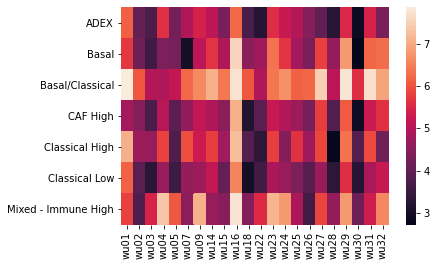

In [262]:
sns.heatmap(distances)

#### ecotyper on pseudo

In [339]:
important = clinical.copy()
important['community'] = [pseudo_only.obs.loc[s, 'community'] if s in pseudo_only.obs.index else np.nan
                   for s in important.index.to_list()]
important = important[~pd.isnull(important['community'])]
important = important[['overall_survival', 'status', 'community']]
important

,overall_survival,status,community
wu01,2.0,Dead,CAF High
wu02,1.0,Dead,Basal
wu03,0.0,Dead,Classical Low
wu04,20.0,Dead,Classical Low
wu05,35.0,Alive,Classical Low
wu07,5.0,Dead,Basal
wu09,8.0,Dead,Classical Low
wu14,29.0,Alive,Mixed - Immune High
wu15,29.0,Alive,Classical Low
wu16,7.0,Dead,Classical Low


In [340]:
ecotypes = pd.read_csv('../data/ecotyper/results/bulk_recovery_pseudo/Ecotypes/ecotype_assignment.txt',
                       sep='\t', index_col=0)
ecotypes = ecotypes.set_index('ID')
ecotypes = pd.merge(ecotypes, important, left_index=True, right_index=True)
ecotypes

,MaxEcotype,AssignmentP,AssignmentQ,AssignedToEcotypeStates,Ecotype,overall_survival,status,community
wu01,E1,0.008465,0.031039,True,E1,2.0,Dead,CAF High
wu07,E1,0.058088,0.137721,True,E1,5.0,Dead,Basal
wu15,E1,0.000611,0.011078,True,E1,29.0,Alive,Classical Low
wu16,E1,0.003168,0.017424,True,E1,7.0,Dead,Classical Low
wu18,E1,0.008118,0.031039,True,E1,12.0,Dead,Classical Low
wu26,E1,0.137841,0.233269,True,E1,19.0,Alive,Classical Low
wu29,E1,0.001007,0.011078,True,E1,13.0,Dead,Classical Low
wu31,E1,0.001824,0.013376,True,E1,13.0,Alive,Classical Low
wu03,E4,0.065923,0.137721,True,E4,0.0,Dead,Classical Low
wu27,E4,0.068861,0.137721,True,E4,12.0,Dead,ADEX


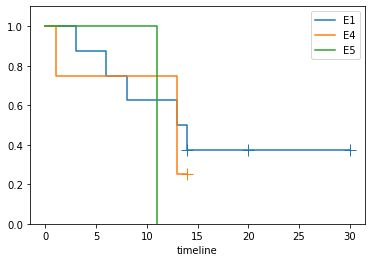

In [341]:
kmf = KaplanMeierFitter()

for cluster in sorted(set(ecotypes['Ecotype'])): 
    kmf.fit(ecotypes[ecotypes['Ecotype']==cluster]['overall_survival'] + 1,
            [0 if x == 'Alive' else 1 for x in ecotypes[ecotypes['Ecotype']==cluster]['status']],
            label=cluster)
    ax = kmf.plot(show_censors=True, ci_show=False, )
    ax.set_ylim((0, 1.1))

In [342]:
ecotypes = pd.read_csv('../data/ecotyper/results/bulk_recovery_pseudo/Ecotypes/ecotype_abundance.txt',
                       sep='\t', index_col=0)
ecotypes = ecotypes.transpose()
ecotypes = pd.merge(ecotypes, important, left_index=True, right_index=True)
ecotypes

,E1,E2,E3,E4,E5,E6,overall_survival,status,community
wu01,3.506215e-01,0.111707,0.061945,0.160826,0.137838,0.177062,2.0,Dead,CAF High
wu02,1.878549e-01,0.085187,0.022964,0.173772,0.311981,0.218241,1.0,Dead,Basal
wu03,1.792152e-01,0.065461,0.172187,0.251814,0.138405,0.192917,0.0,Dead,Classical Low
wu04,9.061478e-15,0.287291,0.123676,0.242894,0.160835,0.185304,20.0,Dead,Classical Low
wu05,2.322957e-02,0.446652,0.121988,0.071047,0.156170,0.180914,35.0,Alive,Classical Low
wu07,2.694238e-01,0.090174,0.152920,0.212467,0.114966,0.160048,5.0,Dead,Basal
wu09,1.012354e-14,0.201715,0.133418,0.275829,0.177625,0.211412,8.0,Dead,Classical Low
wu14,1.207513e-01,0.096991,0.078356,0.181656,0.257017,0.265228,29.0,Alive,Mixed - Immune High
wu15,4.922425e-01,0.038545,0.054747,0.181065,0.059117,0.174284,29.0,Alive,Classical Low
wu16,3.978082e-01,0.048348,0.083450,0.215043,0.037792,0.217559,7.0,Dead,Classical Low


In [308]:
cd8 = pd.read_csv('../data/ecotyper/results/bulk_recovery_pseudo/CD8.T.cell/state_assignment.txt',
                       sep='\t', index_col=0)
cd8 = pd.merge(cd8, important, left_index=True, right_index=True)
cd8

,State,InitialState,overall_survival,status,community
wu01,S01,IS04,2.0,Dead,CAF High
wu15,S01,IS04,29.0,Alive,Classical Low
wu16,S01,IS04,7.0,Dead,Classical Low
wu18,S01,IS04,12.0,Dead,Classical Low
wu27,S01,IS04,12.0,Dead,ADEX
wu29,S01,IS04,13.0,Dead,Classical Low
wu31,S01,IS04,13.0,Alive,Classical Low
wu03,S02,IS02,0.0,Dead,Classical Low
wu07,S02,IS02,5.0,Dead,Basal
wu22,S02,IS02,10.0,Dead,ADEX


so1 should be good, s02 and s03 should be bad

<AxesSubplot:xlabel='State', ylabel='overall_survival'>

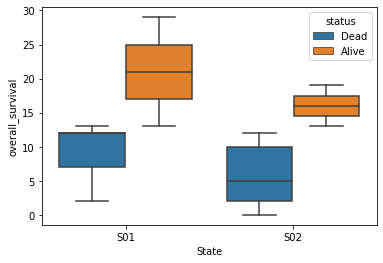

In [284]:
sns.boxplot(data=cd8, x='State', y='overall_survival', hue='status')

In [296]:
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import logrank_test, pairwise_logrank_test, multivariate_logrank_test

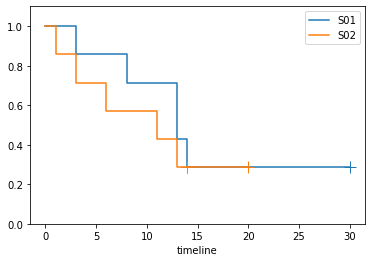

In [293]:
kmf = KaplanMeierFitter()
# ft = cd8
# T = ft['survival_time']
# E = ft['status']
# ft['classification'] = integrated.obs['classification'].to_list()
# groups = ft[f'classification']

for cluster in sorted(set(cd8['State'])): 
    kmf.fit(cd8[cd8['State']==cluster]['overall_survival'] + 1,
            [0 if x == 'Alive' else 1 for x in cd8[cd8['State']==cluster]['status']],
            label=cluster)
    ax = kmf.plot(show_censors=True, ci_show=False, )
    ax.set_ylim((0, 1.1))

In [301]:
result = multivariate_logrank_test(cd8['overall_survival'], cd8['State'],
                                  [False if x == 'Alive' else True
                                   for x in cd8['status']])
result.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           0.26 0.61      0.71

In [309]:
cd8_ab = pd.read_csv('../data/ecotyper/results/bulk_recovery_pseudo/CD8.T.cell/state_abundances.txt',
                       sep='\t', index_col=0)
cd8_ab = cd8_ab.transpose()
cd8_ab = cd8_ab.loc[cd8.index.to_list()]
cd8_ab = pd.merge(cd8_ab, important, left_index=True, right_index=True)
cd8_ab

,S01,S02,S03,overall_survival,status,community
wu01,3.392896e-01,2.680908e-01,2.847413e-01,2.0,Dead,CAF High
wu15,5.960415e-01,1.007973e-01,6.145799e-15,29.0,Alive,Classical Low
wu16,4.475434e-01,2.725114e-01,7.721468e-05,7.0,Dead,Classical Low
wu18,5.121976e-01,2.930083e-02,8.833640e-02,12.0,Dead,Classical Low
wu27,5.895793e-01,2.948016e-01,2.258568e-02,12.0,Dead,ADEX
wu29,5.237912e-01,7.355119e-09,6.415736e-15,13.0,Dead,Classical Low
wu31,6.922307e-01,3.691965e-02,1.597638e-05,13.0,Alive,Classical Low
wu03,1.910391e-01,5.170655e-01,2.293641e-01,0.0,Dead,Classical Low
wu07,3.161887e-01,5.234855e-01,1.490707e-01,5.0,Dead,Basal
wu22,3.499807e-04,5.213880e-01,2.075580e-01,10.0,Dead,ADEX


<AxesSubplot:xlabel='S01', ylabel='overall_survival'>

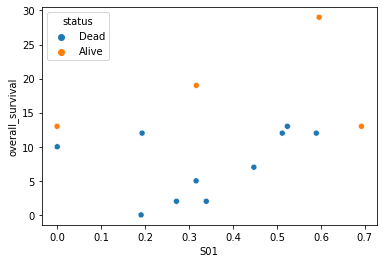

In [310]:
sns.scatterplot(data=cd8_ab, x='S01', y='overall_survival', hue='status')

<AxesSubplot:xlabel='S01', ylabel='overall_survival'>

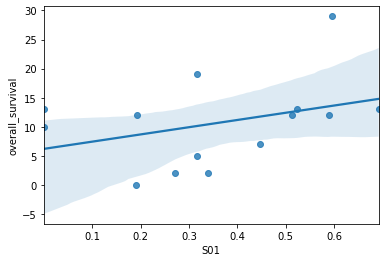

In [311]:
sns.regplot(data=cd8_ab, x='S01', y='overall_survival')

In [312]:
from scipy.stats import spearmanr

In [313]:
spearmanr(cd8_ab['overall_survival'], cd8_ab['S01'])

SpearmanrResult(correlation=0.4262143827281645, pvalue=0.128601248125633)

In [320]:
cd8_ab = pd.read_csv('../data/ecotyper/results/bulk_recovery_pseudo/CD8.T.cell/state_abundances.txt',
                       sep='\t', index_col=0)
cd8_ab = cd8_ab.transpose()
cd8_ab = cd8_ab[cd8_ab['S01']>.001]
cd8_ab = pd.merge(cd8_ab, important, left_index=True, right_index=True)
spearmanr(cd8_ab['overall_survival'], cd8_ab['S01'])

SpearmanrResult(correlation=0.43307235681363293, pvalue=0.10685381574608975)

In [314]:
malignant = pd.read_csv('../data/ecotyper/results/bulk_recovery_pseudo/Malignant/state_assignment.txt',
                       sep='\t', index_col=0)
malignant = pd.merge(malignant, important, left_index=True, right_index=True)
malignant

,State,InitialState,overall_survival,status,community
wu07,S01,IS01,5.0,Dead,Basal
wu26,S01,IS01,19.0,Alive,Classical Low
wu03,S03,IS07,0.0,Dead,Classical Low
wu18,S03,IS07,12.0,Dead,Classical Low
wu22,S03,IS07,10.0,Dead,ADEX
wu24,S03,IS07,24.0,Alive,Classical High
wu05,S04,IS05,35.0,Alive,Classical Low
wu32,S04,IS05,13.0,Alive,ADEX
wu27,S05,IS06,12.0,Dead,ADEX
wu28,S05,IS06,12.0,Dead,ADEX


<AxesSubplot:xlabel='State', ylabel='overall_survival'>

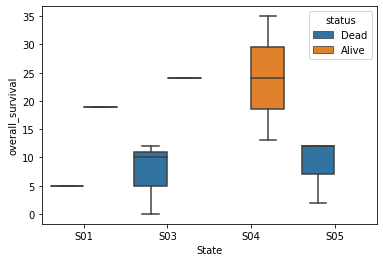

In [321]:
sns.boxplot(data=malignant, x='State', y='overall_survival', hue='status')

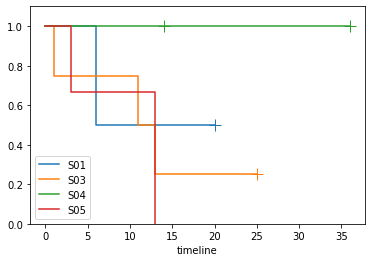

In [322]:
kmf = KaplanMeierFitter()

for cluster in sorted(set(malignant['State'])): 
    kmf.fit(malignant[malignant['State']==cluster]['overall_survival'] + 1,
            [0 if x == 'Alive' else 1 for x in malignant[malignant['State']==cluster]['status']],
            label=cluster)
    ax = kmf.plot(show_censors=True, ci_show=False, )
    ax.set_ylim((0, 1.1))

In [324]:
malignant_ab = pd.read_csv('../data/ecotyper/results/bulk_recovery_pseudo/Malignant/state_abundances.txt',
                       sep='\t', index_col=0)
malignant_ab = malignant_ab.transpose()
malignant_ab = malignant_ab.loc[malignant.index.to_list()]
malignant_ab = pd.merge(malignant_ab, important, left_index=True, right_index=True)
malignant_ab

,S01,S02,S03,S04,S05,overall_survival,status,community
wu07,4.505488e-01,2.277875e-15,1.720850e-01,1.447814e-08,1.573352e-01,5.0,Dead,Basal
wu26,3.962386e-01,1.519201e-03,2.628295e-01,2.310015e-01,1.084112e-01,19.0,Alive,Classical Low
wu03,7.584739e-02,1.544481e-15,3.643826e-01,2.513002e-01,3.084698e-01,0.0,Dead,Classical Low
wu18,5.573867e-15,2.056878e-01,2.145136e-01,8.457017e-03,1.765777e-01,12.0,Dead,Classical Low
wu22,1.383285e-02,3.587866e-03,4.107857e-01,3.680950e-01,2.036986e-01,10.0,Dead,ADEX
wu24,1.021192e-01,2.996532e-15,4.576408e-01,2.323452e-01,2.078949e-01,24.0,Alive,Classical High
wu05,9.565007e-07,2.776025e-01,2.430386e-01,3.310847e-01,3.262544e-15,35.0,Alive,Classical Low
wu32,1.593297e-15,1.593297e-15,4.964838e-02,4.450717e-01,4.149923e-01,13.0,Alive,ADEX
wu27,1.949127e-01,3.234574e-10,4.133801e-15,4.133801e-15,5.622617e-01,12.0,Dead,ADEX
wu28,1.687602e-15,6.229307e-03,3.179689e-01,2.515133e-01,4.242885e-01,12.0,Dead,ADEX


<AxesSubplot:xlabel='S01', ylabel='overall_survival'>

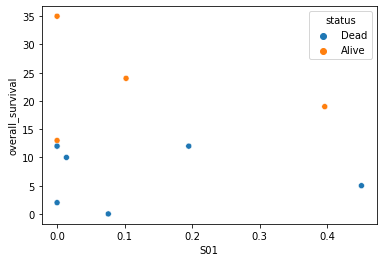

In [326]:
sns.scatterplot(data=malignant_ab, x='S01', y='overall_survival', hue='status')

<AxesSubplot:xlabel='S02', ylabel='overall_survival'>

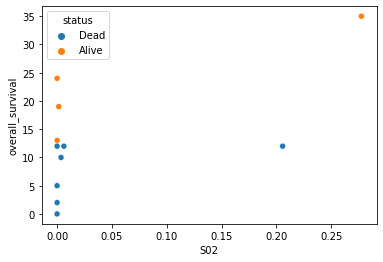

In [327]:
sns.scatterplot(data=malignant_ab, x='S02', y='overall_survival', hue='status')

<AxesSubplot:xlabel='S03', ylabel='overall_survival'>

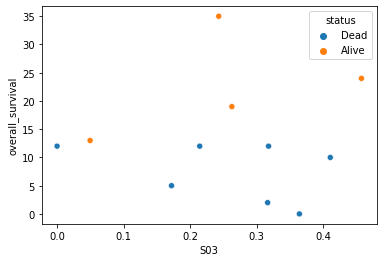

In [328]:
sns.scatterplot(data=malignant_ab, x='S03', y='overall_survival', hue='status')

<AxesSubplot:xlabel='S04', ylabel='overall_survival'>

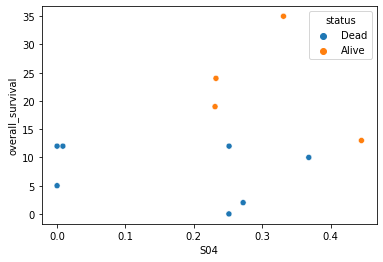

In [329]:
sns.scatterplot(data=malignant_ab, x='S04', y='overall_survival', hue='status')

<AxesSubplot:xlabel='S05', ylabel='overall_survival'>

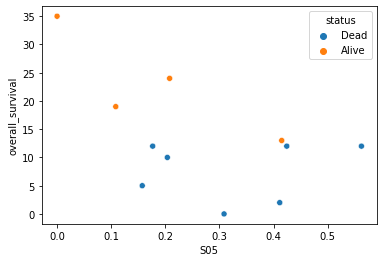

In [330]:
sns.scatterplot(data=malignant_ab, x='S05', y='overall_survival', hue='status')

In [331]:
malignant_ab = pd.read_csv('../data/ecotyper/results/bulk_recovery_pseudo/Malignant/state_abundances.txt',
                       sep='\t', index_col=0)
malignant_ab = malignant_ab.transpose()
# malignant_ab = malignant_ab.loc[malignant.index.to_list()]
malignant_ab = pd.merge(malignant_ab, important, left_index=True, right_index=True)
malignant_ab

,S01,S02,S03,S04,S05,overall_survival,status,community
wu01,2.167996e-02,2.912954e-15,2.912954e-15,2.912954e-15,1.885867e-02,2.0,Dead,CAF High
wu02,2.968282e-15,1.332010e-02,8.737192e-10,2.968282e-15,2.968282e-15,1.0,Dead,Basal
wu03,7.584739e-02,1.544481e-15,3.643826e-01,2.513002e-01,3.084698e-01,0.0,Dead,Classical Low
wu04,7.484072e-02,8.674499e-03,1.345944e-02,1.779800e-15,1.779800e-15,20.0,Dead,Classical Low
wu05,9.565007e-07,2.776025e-01,2.430386e-01,3.310847e-01,3.262544e-15,35.0,Alive,Classical Low
wu07,4.505488e-01,2.277875e-15,1.720850e-01,1.447814e-08,1.573352e-01,5.0,Dead,Basal
wu09,3.936626e-02,1.492712e-02,1.766809e-02,1.831179e-15,4.325010e-06,8.0,Dead,Classical Low
wu14,3.723697e-15,3.081701e-01,1.009047e-01,8.025129e-02,1.974432e-02,29.0,Alive,Mixed - Immune High
wu15,3.244768e-02,3.051710e-04,4.238042e-15,4.238042e-15,1.544214e-01,29.0,Alive,Classical Low
wu16,1.041221e-01,7.572148e-05,3.160641e-15,3.160641e-15,5.159891e-02,7.0,Dead,Classical Low


S01


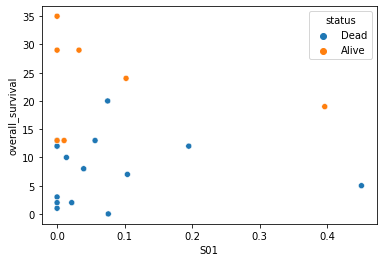

S02


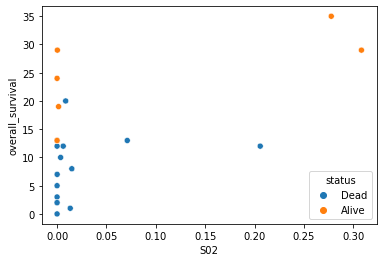

S03


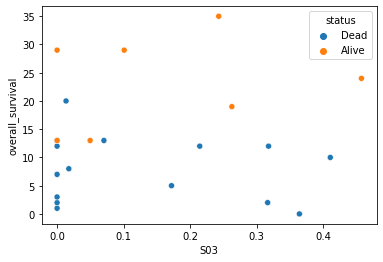

S04


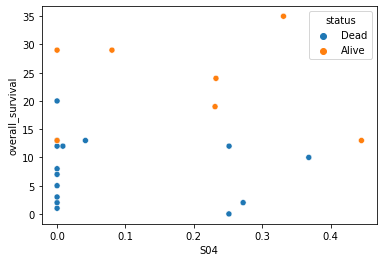

S05


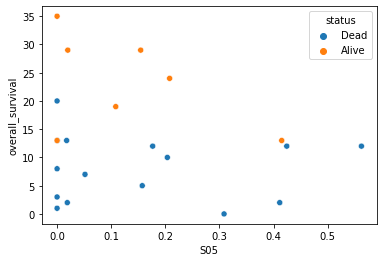

In [333]:
for s in malignant_ab.columns[:-3]:
    print(s)
    sns.scatterplot(data=malignant_ab, x=s, y='overall_survival', hue='status')
    plt.show()